**Nayan Chavan**

In this notebook, I will use the  following three models: (1) Ordinary Least Squares, (2) Ridge Regression, and (3) Lasso Regression to find the coefficients of each of the linear models to relate the wine quality to the other features in the wine dataset. The source code for all my findings can be found and cited throughout this notebook. Each model's section within the notebook contains explanations to accompany code cells. 

## Wine Data Setup

In the following cells, I read the wine quality csv and change it into a Pandas dataframe. This will make the data much more readable and workable for later usage. Also, in the immediate cell, I imported the necessary packages required throughout this notebook for the previously mentioned models. 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model as lm
! pip install plotly
import plotly.graph_objects as go

In [3]:
winedata = pd.read_csv('winequality-red.csv')
winedata = pd.read_csv('winequality-red.csv', sep=';')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# (1) Ordinary Least Squares

In the following section of code, I created a X and Y training set as well as a X and Y testing set. Using the sklearn package's LinearRegression function, I fitted the OLS model to the X and Y training sets. The train-test split is 80-20 from the original wine quality dataset. 

Then, I adapted the rmse and cross_validate_rmse methods from the Spring 2020 Data 100 Resources. These two methods will allow us to calculate the root mean squared error and the cross-validation RMSE, respectively, for use later. 

In [4]:
X = winedata.drop(columns=['quality'])
Y = winedata['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=0)

In [5]:
ols = lm.LinearRegression(fit_intercept=True)
ols = ols.fit(X_train,Y_train)
ols_y_hat = ols.predict(X_train)

### *Code adapted from [SP20 DATA 100 Resources](https://ds100.org/sp20/resources/assets/lectures/lec18/TrainTestSplitAndCrossValidation.html)*

In [6]:
from sklearn.model_selection import KFold 
from sklearn.base import clone 

def rmse(y, y_hat):
    return np.sqrt(np.mean((y - y_hat)**2))

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

## OLS Regression Coefficients

The OLS Regression coefficient values are found in the table below mapped with their corresponding feature. Given that quality is the dependent variable and what we are trying to predict with the data from the other 11 features, we can find which features may increase the quality value and which features may decrease the quality.

Positive coefficients indicate that as the value of this independent variable increases, the dependent variable will also tend to increase. Negative coefficients indicate that as the value of this independent variable increases, the dependent variable will tend to decrease.

Knowing this, we see that fixed acidity, residual sugar, free sulfur dioxide, sulphates, and alcohol have a positive relationship with wine quality due to their positive coefficients. Whereas, volatile acidity, citric acidity, chlorides, total sulfur dioxide, density, and pH have a negative relationship due to their negative coefficients. 

Although these coefficients have positive and negative signages, some have little to no effect on wine quality. 

To find the coefficients, I was able to get all the coefficients with .coef_ from the LinearRegression function. Then, I made a Pandas dataframe and joined the appropriate feature names. The intercept value is also included in the table below. 

In [7]:
ols_coef = ols.coef_
Y_columns_df = pd.DataFrame(X.columns.values).rename(columns = {0: 'Feature'})
ols_coef_df = pd.DataFrame(ols.coef_).rename(columns = {0: 'Coefficient'})
ols_result = pd.concat([Y_columns_df, ols_coef_df], axis=1) 
ols_result
ols_intercept_row = {'Feature': 'Intercept Constant', 'Coefficient': ols.intercept_}
ols_result = ols_result.append(ols_intercept_row, ignore_index=True)
ols_result

,Feature,Coefficient
0,fixed acidity,0.041284
1,volatile acidity,-1.149528
2,citric acid,-0.177927
3,residual sugar,0.027870
4,chlorides,-1.873407
5,free sulfur dioxide,0.002684
6,total sulfur dioxide,-0.002777
7,density,-31.516666
8,pH,-0.254486
9,sulphates,0.924040


## OLS Model Intercept

In [8]:
print("OLS Model Intercept:", ols.intercept_)

OLS Model Intercept: 34.99871062872092


## Cross Validation RSME of the OLS Model

Utilizing the Data100, cited earlier, when cross-validating our results we find that the cross-validation RMSE value is **.6633**.

In [9]:
cross_validate_rmse(ols, X_train, Y_train)

print("Cross-Validation Root Mean Squared Error for OLS:", cross_validate_rmse(ols, X_train, Y_train))

Cross-Validation Root Mean Squared Error for OLS: 0.6632971683255627


## Training and Test Accuracy

In the following cell, I found the OLS Training and Testing accuracies. We find that the OLS Testing Accuracy tends to be less than the OLS Training Accuracy. This is correct since the testing accuracy should never be higher than the training accuracy because our model was optimized on the test set.

In [10]:
ols_training_acc = mean_squared_error(Y_train, ols.predict(X_train)) 
ols_test_acc = mean_squared_error(Y_test, ols.predict(X_test))

print("OLS Training Accuracy:", ols_training_acc)
print("OLS Testing Accuracy:", ols_test_acc)

OLS Training Accuracy: 0.4258083784387742
OLS Testing Accuracy: 0.38447119782012595


## OLS Equation - *may vary due to randomness*

quality = (.024991)fixed acidity + (-1.083590)volatile acidity + (-0.182564)citric acid + (0.016331)residual sugar + (-1.874225)chlorides + (0.004361)free sulfur dioxide + (-0.003265)total sulfur dioxide + (-17.881164)density + (-0.413653)pH + (0.916334)sulphates + (0.276198)alcohol + 34.9987

# (2) Ridge Regression

To create the Ridge Regression model, I used the sklearn package's RidgeCV function. This function performs a Ridge Regression with given alphas.

The alpha values are used were a large range of values over 10 ** np.linspace(10,-2,100) * 0.5. This was so that the model could be tuned with those parameters before actually creating the Ridge Regression model with the RidgeCV() function. The store_cv_values attribute is set to True so that I could chart the stored cross-validation values against the tuning parameters. 

In [11]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [12]:
X = winedata.drop(columns=['quality'])
Y = winedata['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=0)

In [13]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge_regression_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_regression = ridge_regression_cv.fit(X_train, Y_train)

## Ridge Regression Coefficients

Following the same logic as finding the coefficients for the OLS model, the coefficients and intercetp for the Ridge Regression model can be found below mapped to their corresponding features. 

In [14]:
rr_coef = ridge_regression.coef_
Y_columns_df = pd.DataFrame(X.columns.values).rename(columns = {0: 'Feature'})
rr_coef_df = pd.DataFrame(ridge_regression.coef_).rename(columns = {0: 'Coefficient'})
rr_result = pd.concat([Y_columns_df, rr_coef_df], axis=1) 
rr_result
rr_intercept_row = {'Feature': 'Intercept Constant', 'Coefficient': ridge_regression.intercept_}
rr_result = rr_result.append(rr_intercept_row, ignore_index=True)
rr_result

,Feature,Coefficient
0,fixed acidity,0.014025
1,volatile acidity,-1.179261
2,citric acid,-0.188598
3,residual sugar,0.014371
4,chlorides,-1.720735
5,free sulfur dioxide,0.002952
6,total sulfur dioxide,-0.002832
7,density,-0.096986
8,pH,-0.390222
9,sulphates,0.854233


## Ridge Regression Intercept

In [15]:
print("Ridge Regression Model Intercept:", ridge_regression.intercept_)

Ridge Regression Model Intercept: 4.118857932272788


## Alpha Value and Cross-Validation MSE of the Ridge Regression Model

The alpha value, which is the tuning parameter for this particular model, is calculated to be **.2489**. This was found using the .alpha_ function of the RidgeCV() method. 

Since this particular Ridge Regression model uses leave-one-out cross validation, I found the cross_validation Mean Squared Error for the model. The MSE is **.5590**. 

In [16]:
print("Ridge Regression Alpha Value:", ridge_regression.alpha_)
print("\nCross-Validation Mean Squared Error for Ridge Regression:", np.mean(ridge_regression.cv_values_))


Ridge Regression Alpha Value: 0.24885117821660568

Cross-Validation Mean Squared Error for Ridge Regression: 0.5590436268056257


## Plot of Tuning Parameters versus Cross-Validation MSE for Ridge Regression

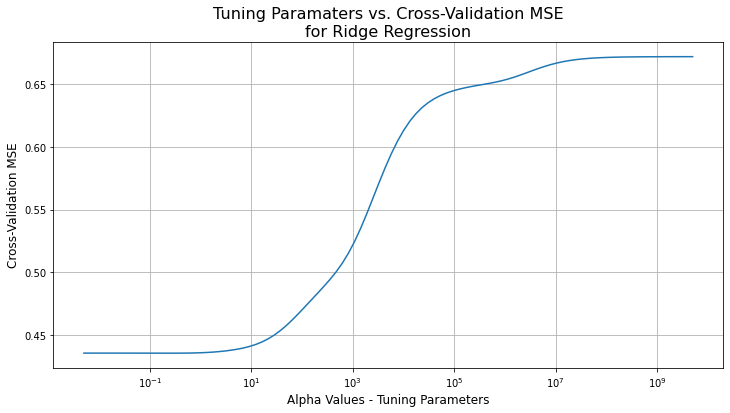

In [17]:
plt.figure(figsize=(12,6))
rr_cv = ridge_regression.cv_values_
rr_plot = plt.gca()
rr_plot.plot(alphas, rr_cv.mean(axis=0))
rr_plot.set_xscale('log')
plt.grid(True, which='both')
plt.title("Tuning Paramaters vs. Cross-Validation MSE\nfor Ridge Regression", fontsize = 16)
plt.xlabel('Alpha Values - Tuning Parameters', fontsize = 12)
plt.ylabel('Cross-Validation MSE', fontsize = 12);

In [18]:
print("Training Ridge Regression Mean Squared Error:", mean_squared_error(y_true=Y_train, y_pred=ridge_regression.predict(X_train)))

print("\nTesting Ridge Regression Mean Squared Error:", mean_squared_error(y_true=Y_test, y_pred=ridge_regression.predict(X_test)))

Training Ridge Regression Mean Squared Error: 0.4264447822657277

Testing Ridge Regression Mean Squared Error: 0.38258282757909606


# (3) Lasso Regression

To create the Lasso Regression model, I used the sklearn package's LassoLarsCV() function. This particular type of Lasso Regression model cross-validates the regression by utilizing the least-angle-regression method. Due to the LARS algorithm, a range of alphas was not needed since it obtains the alphas needed on its own.

In [19]:
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import GridSearchCV

In [20]:
X = winedata.drop(columns=['quality'])
Y = winedata['quality']

In [21]:

lasso_regression_cv = LassoLarsCV()
lasso_regression = lasso_regression_cv.fit(X_train, Y_train)

## Lasso Regression Coefficients

The coefficients and intercept values for the Lasso Regression are provided below. The methodology to finding these values is the same as the OLS and Ridge Regression approaches. 

In [22]:
lr_coef = lasso_regression.coef_
Y_columns_df = pd.DataFrame(X.columns.values).rename(columns = {0: 'Feature'})
lr_coef_df = pd.DataFrame(lasso_regression.coef_).rename(columns = {0: 'Coefficient'})
lr_result = pd.concat([Y_columns_df, lr_coef_df], axis=1) 
lr_result
lr_intercept_row = {'Feature': 'Intercept Constant', 'Coefficient': lasso_regression.intercept_}
lr_result = lr_result.append(lr_intercept_row, ignore_index=True)
lr_result


,Feature,Coefficient
0,fixed acidity,0.003840
1,volatile acidity,-1.107921
2,citric acid,0.000000
3,residual sugar,0.003266
4,chlorides,-1.515496
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,-0.001834
7,density,0.000000
8,pH,-0.237571
9,sulphates,0.760626


## Lasso Regression Intercept

In [23]:
print("Lasso Regression Model Intercept:", lasso_regression.intercept_)

Lasso Regression Model Intercept: 3.717209688879082


## Alpha Value and MSE of the Lasso Regression Model

Using similar methodology from the Ridge Regression analysis, I was able to obtain the alpha value, MSE of the model, and MSE for the training and testing tests of the Lasso Regression. The source code for these calculations is below. One difference is that I used the built-in function of mse_path_.mean() to find the MSE. The MSE of the model is **.4822**. The alpha value is **.0004037**.

In [24]:
print("Lasso Regression Alpha Value:", lasso_regression.alpha_)
print("\nMean Squared Error for Lasso Regression:", lasso_regression.mse_path_.mean())

print("\nTraining Lasso Regression Mean Squared Error:", mean_squared_error(Y_train, lasso_regression.predict(X_train)))
print("\nTesting Lasso Regression Mean Squared Error:", mean_squared_error(Y_test, lasso_regression.predict(X_test)))


Lasso Regression Alpha Value: 0.00040369988827837434

Mean Squared Error for Lasso Regression: 0.4822443054521145

Training Lasso Regression Mean Squared Error: 0.4290037889546166

Testing Lasso Regression Mean Squared Error: 0.38604944927093043


## Plot of Tuning Parameters versus Cross-Validation MSE for Lasso Regression

In this section, I utilized the Lasso() function of the sklearn package. I found this particular Lasso Regression function to be optimal to create the plot of the alpha tuning parameters versus the cross-validation MSE for the Lasso Regression. 

Due to this, I created an alpha range of np.linspace(.0001, .001, 101). The code below basically obtains my CV values for the plot using the neg_mean_squared_error scoring type. 

Although I used a different function to create the model, the plot still checks out since it is fitted on the training data. Earlier, we obtained that the best alpha value was **.0004037**. On the plot, we can see at this alpha value the MSE is correctly minimized.

In [25]:
lasso = Lasso()
grid_vals = {'alpha': np.linspace(.0001, .001, 101)}
lasso_cv = GridSearchCV(lasso, grid_vals, scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(X_train,Y_train);

In [26]:
lr_alphas = lasso_cv.cv_results_['param_alpha'].data
lr_MSE = lasso_cv.cv_results_['mean_test_score']*(-1)

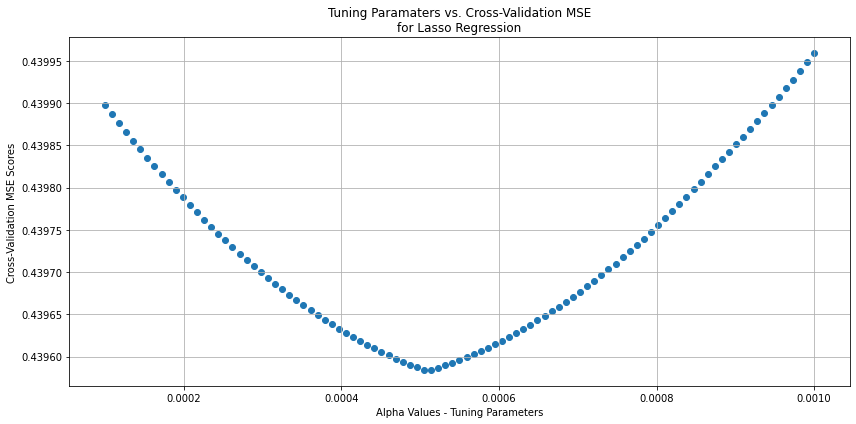

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(lr_alphas, lr_MSE)
plt.title("Tuning Paramaters vs. Cross-Validation MSE\nfor Lasso Regression")
plt.xlabel('Alpha Values - Tuning Parameters')
plt.ylabel('Cross-Validation MSE Scores')

plt.grid(True, which='both')
plt.tight_layout();

# Conclusion

In [31]:
cv_score_ols = np.mean(np.negative(cross_val_score(ols, X_test, Y_test, scoring = 'neg_mean_squared_error', cv =5)))
cv_score_rr = np.mean(np.negative(cross_val_score(ridge_regression, X_test, Y_test, scoring = 'neg_mean_squared_error', cv =5)))
cv_score_lr = np.mean(np.negative(cross_val_score(lasso_regression, X_test, Y_test, scoring = 'neg_mean_squared_error', cv =5)))

print("Cross-Validation Score for OLS:", cv_score_ols)
print("Cross-Validation Score for Ridge Regression:", cv_score_rr)
print("Cross-Validation Score for Lasso Regression:", cv_score_lr)

def print_min_cv_score(ols, rr, lr):
    if (min(ols, rr, lr) == ols):
        return "Ordinary Least Squares"
    elif (min(ols, rr, lr) == rr):
        return "Ridge Regression"
    elif (min(ols, rr, lr) == lr):
        return "Lasso Regression"

print("\nBest Model for Wine Quality Dataset:", print_min_cv_score(cv_score_ols, cv_score_rr, cv_score_lr))


Cross-Validation Score for OLS: 0.4020449386718717
Cross-Validation Score for Ridge Regression: 0.3988367119666093
Cross-Validation Score for Lasso Regression: 0.39769868979883183

Best Model for Wine Quality Dataset: Lasso Regression


**In conclusion, in the immediately above cell, we see the cross-validation scores for all three models. The model with the smallest cross-validation is the Lasso Regression. However, the difference between the Cross-Validation scores between the Ridge and Lasso Regressions is marginal. Therefore, in this particular notebook and setup, we can conclude that the Lasso Regression fits the wine quality data the best.** 